In [ ]:
#Done By
#Name: Y.Adarsha
#RegNo: 18BCE7186

In [ ]:
import cv2
import numpy as np
import types
from google.colab.patches import cv2_imshow

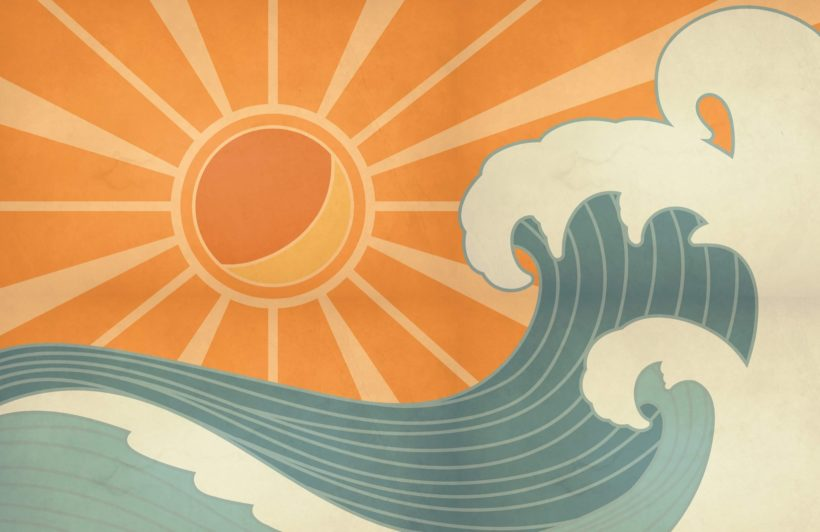

In [ ]:
#upload an image in google colab and rename it as test1.jpg
img = cv2.imread('test1.jpg',cv2.IMREAD_COLOR)
cv2_imshow(img)

In [ ]:
print(img)

[[[ 56 129 220]
  [ 55 128 219]
  [ 54 127 218]
  ...
  [115 174 230]
  [114 173 229]
  [114 173 229]]

 [[ 56 129 220]
  [ 55 128 219]
  [ 55 128 219]
  ...
  [115 174 230]
  [114 173 229]
  [114 173 229]]

 [[ 56 129 220]
  [ 55 128 219]
  [ 55 128 219]
  ...
  [115 174 230]
  [114 173 229]
  [114 173 229]]

 ...

 [[144 160 137]
  [144 160 137]
  [144 160 137]
  ...
  [187 222 232]
  [187 222 232]
  [187 222 232]]

 [[144 160 137]
  [144 160 137]
  [144 160 137]
  ...
  [187 222 232]
  [187 222 232]
  [187 222 232]]

 [[145 161 138]
  [144 160 137]
  [143 159 136]
  ...
  [187 222 232]
  [187 222 232]
  [187 222 232]]]


In [ ]:
# for i in img:
#   for j in i:           #j->pixels 
#     r=j[0]
#     g=j[1]
#     b=j[2]
type(img[0][0][0])

numpy.uint8

In [ ]:
def msgToBinary(msg):
  if type(msg)==str:
    s=''
    for i in msg:
      s=s+format(ord(i),"08b")
    return s
  elif type(msg)==int or type(msg)==np.uint8:
    #return "{0:b}".format(msg)
    return format(msg,"08b")
print(msgToBinary("Adarsha"))
print("\n")
print(msgToBinary(img[0][0][0]))

01000001011001000110000101110010011100110110100001100001


00111000


In [ ]:
print(img.shape)
size_of_img=img.shape[0]*img.shape[1]*3//8 #width*length*rgb(3 8-bits)//8 = bytes format
print(size_of_img)

(532, 820, 3)
163590


In [ ]:
def encode(message):
  if len(message)>size_of_img:
    print("Insufficient bytes")
    return 0
  i=0
  message=message+"###";
  msg=msgToBinary(message)
  size_of_msg=len(msg)
  for a in img:
    for p in a:
      r=msgToBinary(p[0])
      g=msgToBinary(p[1])
      b=msgToBinary(p[2])
      if i < size_of_msg:
        p[0]=int(r[:-1]+msg[i],2)
        i=i+1
      if i < size_of_msg:
        p[0]=int(g[:-1]+msg[i],2)
        i=i+1
      if i < size_of_msg:
        p[0]=int(b[:-1]+msg[i],2)
        i=i+1
      if i>=size_of_msg:
        break  
    return img              

In [ ]:
for a in img:
    for p in a:
      r=msgToBinary(p[0])
      g=msgToBinary(p[1])
      b=msgToBinary(p[2]) 

In [ ]:
print(img)

[[[ 56 129 220]
  [ 55 128 219]
  [ 54 127 218]
  ...
  [115 174 230]
  [114 173 229]
  [114 173 229]]

 [[ 56 129 220]
  [ 55 128 219]
  [ 55 128 219]
  ...
  [115 174 230]
  [114 173 229]
  [114 173 229]]

 [[ 56 129 220]
  [ 55 128 219]
  [ 55 128 219]
  ...
  [115 174 230]
  [114 173 229]
  [114 173 229]]

 ...

 [[144 160 137]
  [144 160 137]
  [144 160 137]
  ...
  [187 222 232]
  [187 222 232]
  [187 222 232]]

 [[144 160 137]
  [144 160 137]
  [144 160 137]
  ...
  [187 222 232]
  [187 222 232]
  [187 222 232]]

 [[145 161 138]
  [144 160 137]
  [143 159 136]
  ...
  [187 222 232]
  [187 222 232]
  [187 222 232]]]


In [ ]:
secret_message = input("Enter message to be encrypted:")

Enter message to be encrypted:Adarsha


In [ ]:
print(encode(secret_message))#message is encrypted

[[[220 129 220]
  [218 128 219]
  [218 127 218]
  ...
  [115 174 230]
  [114 173 229]
  [114 173 229]]

 [[ 56 129 220]
  [ 55 128 219]
  [ 55 128 219]
  ...
  [115 174 230]
  [114 173 229]
  [114 173 229]]

 [[ 56 129 220]
  [ 55 128 219]
  [ 55 128 219]
  ...
  [115 174 230]
  [114 173 229]
  [114 173 229]]

 ...

 [[144 160 137]
  [144 160 137]
  [144 160 137]
  ...
  [187 222 232]
  [187 222 232]
  [187 222 232]]

 [[144 160 137]
  [144 160 137]
  [144 160 137]
  ...
  [187 222 232]
  [187 222 232]
  [187 222 232]]

 [[145 161 138]
  [144 160 137]
  [143 159 136]
  ...
  [187 222 232]
  [187 222 232]
  [187 222 232]]]


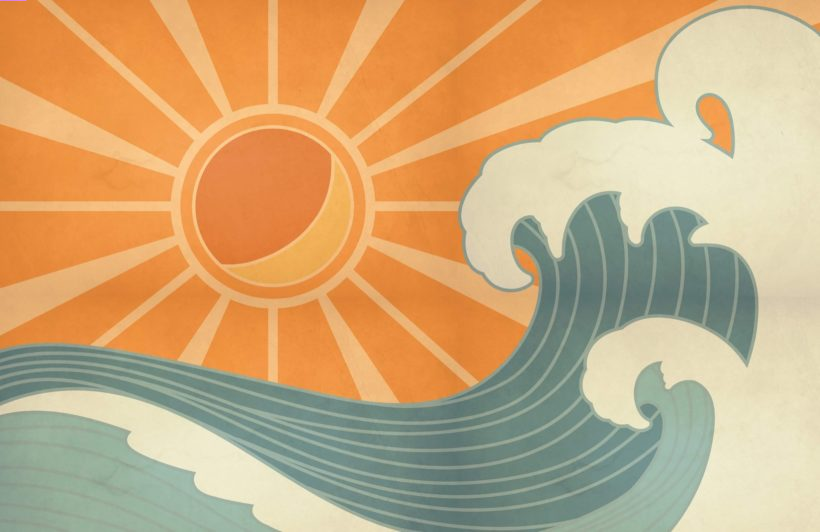

In [ ]:
cv2_imshow(encode(secret_message))#encrypted image

In [ ]:
cv2.imwrite("test2.jpg",encode(secret_message))#storing encrypted image in test2.jpg

True

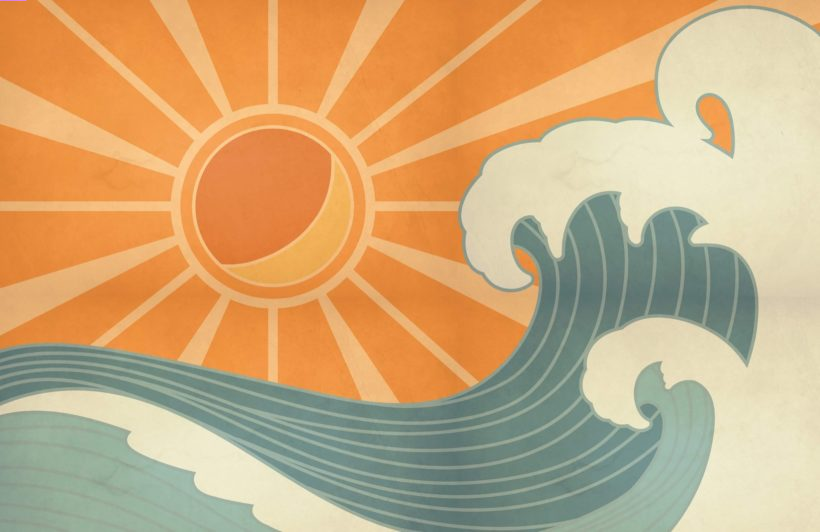

In [ ]:
img1 = cv2.imread('test2.jpg',cv2.IMREAD_COLOR)
cv2_imshow(img)

In [ ]:
#DECRYPTION
def decrypt(image):
  msg="";
  for a in image:
    for p in a:
      r=msgToBinary(p[0])
      g=msgToBinary(p[1])
      b=msgToBinary(p[2])
      msg=msg+r[-1]
      msg=msg+g[-1]
      msg=msg+b[-1]
  bytes1=[ msg[i:i+8] for i in range(0,len(msg),8)]
  m="";
  for b in bytes1:
    m=m+chr(int(b,2));
    if m[-3:]=="###":
      break
  return m[:-3]; #the last 3 characters are delimiter so it is need not to be returned 

In [ ]:
#decrypt(encode(secret_message))
img1 = cv2.imread('test2.jpg',cv2.IMREAD_COLOR)
#encode(secret_message)
decrypt(img1)

'µ$\xadI[nê\x8añ\x16ýtsöÛ»Ê\\F¬[\x8ac¶+\x86ãm½¤$\x92IØ\x92vÛ\x13¶Ø\x93\x89ÛbvÛ\x12I;lqÛm¶oÌ1©.N\x12HÛ\x91¸Þ(ì\\\x9d@ä\x93lNÛbIÛm¶$\x92IÄìv\'lIÛ\x13¶Ø\x9d¶Ù·\x1bÍ¸\x08èÝ^\x0eI6JÚ\x95ª¤\xadI*ª©*\xad©[jUT\x92I+mª¥UN_EJæäu$\x92µ+Rý¿íH\t6\x9a\x9f\x1fÚÓ\x8eÛm¶Û\x12II*ªI$\x92\x00\x00\x00m+mI$\x92«ÿø¶ÛmI[mm&ä\x8d±Àpì_\x0e%\x8egµ¢+Ëì[\x12NØ\x93¶Ø\x93\x89Ûm¶$\x9d¶8\x92qÛm¶Ûm¶$\x9d¶Ä\x93±Ûm¶8\x9cNÛbIÛm¶\'m¶Ûm¶´\x92IÚÚ\xadâM\x89;\x1bv´u]\x90¤¯\\\x95ô\x8c\tàöÔ\x92ªÔ\x97\x84\x96ËÉ¶Û\x95XÕVI2\'\x16\\\'\x15R¿ÿÿ\x1c\x0e8\x928ä\x91Æä\x91±þÿ\x1f4wFÀjx!gE\x96Ù\x05.8\x92¨\x0e6ÛÚBI$\x92vØ\x9d±\'m\x898\x9d¶Äí¶ÇbvÇ\x1d¶Ûg\x04Ce\x0f\x0f\x12ä\x91¹\x1c\x8d\x92\x8eÅÇÓ\x1a8É8\x9d¶$\x9d¶ÛbI$\x9cNÄí±\'m±\'bvÄ\x9d\x9b\x91½\x1b\x80\x8e\x8dÕï\x1bl\x95j©*ªJÛUª«mª«U¶¤\xad¶¤\xad¶ÔªU$åôZ·ñÇjI[Uµ/Üþ¤¿Ð\x88<\x1a\x02R8í¶ÛbvØ\x94\x92ªÛm¶ßÿÿöÒVÛm¶Ô¸ÿËm¶Ô\x95µ&ÒnHÛ\x1f\x84Î1©á{\x80/\x957#\x9dE\x89$í±$âI;\x1d¶ÛbNÛbv\'\x1d¶Ûm¶ÛbNÛ\x12I;\x1d¶Ûc\x89Äí¶$\x92I$\x92vÛm¶ÛkI$\x92mªÙå\'m¶´\x9b[\x80I\x89K¹³Éþ>\x81¶8\x1c\x01øÿ\x89\x0b\x8dí\